In [1]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
resto = pd.read_csv('Top250.csv')

# Data Preparation

Display the top 5 data in the set

In [3]:
resto.head()

,Rank,Restaurant,Content,Sales,YOY_Sales,Units,YOY_Units,Headquarters,Segment_Category
0,1,McDonald's,NaN,40412,4.9%,13846,-0.5%,NaN,Quick Service & Burger
1,2,Starbucks,NaN,21380,8.6%,15049,3.0%,NaN,Quick Service & Coffee Cafe
2,3,Chick-fil-A,While Popeyes got a lot of the chicken buzz in...,11320,13.0%,2470,5.0%,NaN,Quick Service & Chicken
3,4,Taco Bell,NaN,11293,9.0%,6766,2.7%,NaN,Quick Service & Mexican
4,5,Burger King,NaN,10204,2.7%,7346,0.2%,NaN,Quick Service & Burger


Display the bottom 5 of the dataset

In [4]:
resto.tail()

,Rank,Restaurant,Content,Sales,YOY_Sales,Units,YOY_Units,Headquarters,Segment_Category
245,246,Rainforest Cafe,NaN,129,-10.4%,18,-5.3%,NaN,Varied Menu
246,247,PDQ,NaN,127,-5.5%,56,-11.1%,NaN,Chicken
247,248,Lupe Tortilla,NaN,127,12.1%,25,8.7%,NaN,Mexican
248,249,Cook-Out Restaurant,NaN,126,10.1%,270,7.1%,NaN,Burger
249,250,Jollibee,NaN,126,15.2%,40,11.1%,NaN,Chicken


Number of rows and columns in the data 

In [5]:
resto.shape

(250, 9)

Name of the columns

In [6]:
resto.columns

Index(['Rank', 'Restaurant', 'Content', 'Sales', 'YOY_Sales', 'Units',
       'YOY_Units', 'Headquarters', 'Segment_Category'],
      dtype='object')

Number of unique data each column

In [7]:
resto.nunique()

Rank                250
Restaurant          250
Content              33
Sales               203
YOY_Sales           172
Units               214
YOY_Units           140
Headquarters         39
Segment_Category     48
dtype: int64

Check for null values

In [8]:
resto.isnull()

,Rank,Restaurant,Content,Sales,YOY_Sales,Units,YOY_Units,Headquarters,Segment_Category
0,False,False,True,False,False,False,False,True,False
1,False,False,True,False,False,False,False,True,False
2,False,False,False,False,False,False,False,True,False
3,False,False,True,False,False,False,False,True,False
4,False,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...
245,False,False,True,False,False,False,False,True,False
246,False,False,True,False,False,False,False,True,False
247,False,False,True,False,False,False,False,True,False
248,False,False,True,False,False,False,False,True,False


# Data Cleaning

Remove columns content and headquarters

In [9]:
resto_cleaned =  resto.drop(['Content', 'Headquarters'], axis=1)

Convert YOY_Sales and YOY_Units to float

In [10]:
resto_cleaned['YOY_Sales'] = resto_cleaned['YOY_Sales'].str.strip("%").astype(float)
resto_cleaned['YOY_Units'] = resto_cleaned['YOY_Units'].str.strip("%").astype(float) 

Rename columns for better clarification of the units

In [11]:
resto_cleaned = resto_cleaned.rename(columns={'YOY_Sales': 'YOY_Sales(%)', 'YOY_Units': 'YOY_Units(%)'})

# Data Analysis

## Statistics

## Observation
The average sales for the top 250 restaurants are 1242.74 (in millions) and their average units are 850.076. The restaurant with the most sales made a total of 40412.00 (in millions) sales and the one with the most units had 23801. While the least number of sales had 126.00 (in millions) and the least number of units are 13.00.

In [12]:
resto_cleaned.describe()

,Rank,Sales,YOY_Sales(%),Units,YOY_Units(%)
count,250.000000,250.00000,250.000000,250.000000,250.000000
mean,125.500000,1242.74000,2.938400,850.076000,1.219200
std,72.312977,3365.22882,8.953784,2296.151659,7.936431
min,1.000000,126.00000,-21.200000,13.000000,-32.800000
25%,63.250000,181.00000,-2.375000,85.000000,-2.025000
50%,125.500000,330.00000,2.200000,207.000000,0.000000
75%,187.750000,724.75000,6.575000,555.250000,3.475000
max,250.000000,40412.00000,39.500000,23801.000000,38.500000


## Observation 
Most of the restaurants in this list fall under the category of Varied Menu 


In [13]:
# this dictionary will be used to create a new data frame for the value_counts of the Segment_Category for easier joining later.
count_per_segment = { "Segment_Category":[], "Count":[] }

In [14]:
for index, value in resto_cleaned["Segment_Category"].value_counts().items():
    count_per_segment["Segment_Category"].append(index)
    count_per_segment["Count"].append(value)
counts_df = pd.DataFrame(count_per_segment, columns=["Segment_Category", "Count"])
counts_df.head(10)

,Segment_Category,Count
0,Varied Menu,22
1,Mexican,14
2,Quick Service & Burger,13
3,Family Style,10
4,Burger,10
5,Italian/Pizza,10
6,Casual Dining & Varied Menu,9
7,Steak,9
8,Pizza,9
9,Quick Service & Pizza,8


Text(0.5, 0, 'Frequency Count')

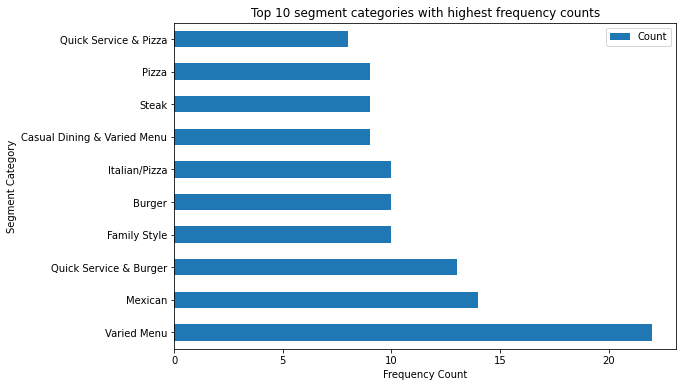

In [15]:
ax = counts_df.head(10).plot.barh(figsize=(9,6), x="Segment_Category")
ax.set_title("Top 10 segment categories with highest frequency counts")
ax.set_ylabel("Segment Category")
ax.set_xlabel("Frequency Count")

## Observation 
The segment category, quick service & burger garnered the top sales

In [16]:
sales_by_segment_categ = resto_cleaned.groupby('Segment_Category')["Sales"].sum().to_frame().sort_values(by="Sales", ascending=False)
sales_by_segment_categ.head(10) 

,Sales
Segment_Category,
Quick Service & Burger,79384
Quick Service & Coffee Cafe,31889
Quick Service & Chicken,22619
Quick Service & Pizza,21316
Casual Dining & Varied Menu,15686
Quick Service & Sandwich,14965
Quick Service & Mexican,12143
Family Dining & Family Style,11677
Casual Dining & Steak,8014


Text(0.5, 0, 'Sales')

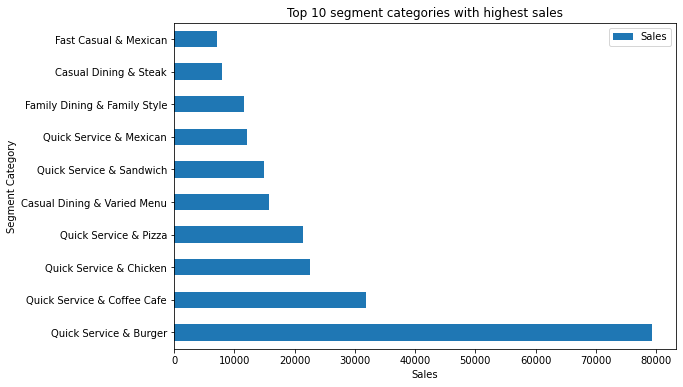

In [17]:
viz_sales = sales_by_segment_categ.head(10).reset_index()
ax = viz_sales.plot.barh(figsize=(9,6), x="Segment_Category", y="Sales")
ax.set_title("Top 10 segment categories with highest sales")
ax.set_ylabel("Segment Category")
ax.set_xlabel("Sales")

## Exploratory Analysis
Which generalized category will have the most sales? <br>
(Generalization: All segment categories with prefixes(ie. Quick Service, Casual Dining, etc.) will be joined with respective segment category however, their suffixes(ie. Burger, Pizza) will not be joined with those data without prefixes.)  

## Observation 
The quick service category made the most total number of sales

In [18]:
# splitting the data and making another column for the data frame
split_categ = resto_cleaned['Segment_Category'].str.split("&", n = -1, expand = True)
resto_cleaned['Category'] = split_categ[0]

In [19]:
sales_by_categ = resto_cleaned.groupby('Category')["Sales"].sum().to_frame().sort_values(by='Sales', ascending=False)
sales_by_categ.head(10)

,Sales
Category,
Quick Service,192513
Casual Dining,38689
Fast Casual,32699
Family Dining,11677
Varied Menu,4610
Mexican,3396
Steak,2989
Pizza,2585
Family Style,2292


Text(0.5, 0, 'Sales')

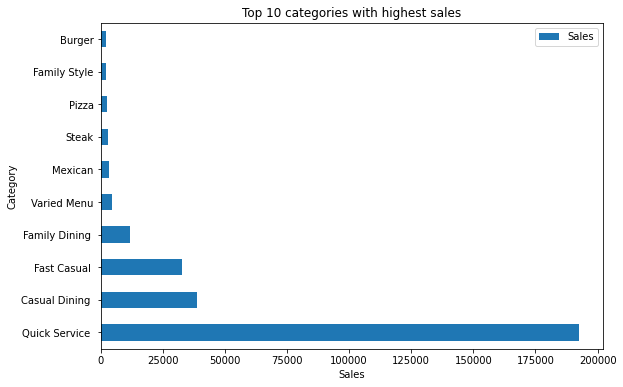

In [20]:
viz_sales_categ = sales_by_categ.head(10).reset_index()
ax = viz_sales_categ.plot.barh(figsize=(9,6), x="Category", y="Sales")
ax.set_title("Top 10 categories with highest sales")
ax.set_ylabel("Category")
ax.set_xlabel("Sales")

## Observation
The segment category with the most number of units is quick service & burger

In [21]:
units_categ = resto_cleaned.groupby('Segment_Category')["Units"].sum().to_frame().sort_values(by='Units', ascending=False) 
units_categ.head(10)

,Units
Segment_Category,
Quick Service & Burger,39172
Quick Service & Sandwich,28171
Quick Service & Coffee Cafe,25763
Quick Service & Pizza,24027
Quick Service & Chicken,11271
Quick Service & Mexican,7362
Family Dining & Family Style,7047
Quick Service & Frozen Desserts,6905
Fast Casual & Sandwich,6414


Text(0.5, 0, 'Units')

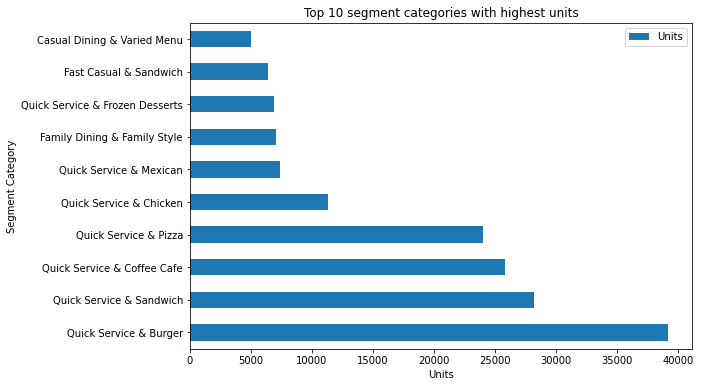

In [22]:
viz_units_categ = units_categ.head(10).reset_index()
ax = viz_units_categ.plot.barh(figsize=(9,6), x="Segment_Category", y="Units")
ax.set_title("Top 10 segment categories with highest units")
ax.set_ylabel("Segment Category")
ax.set_xlabel("Units")

## Exploratory Analysis 
How does the number of units affect the total sales

In [23]:
units_sales = units_categ.join(sales_by_segment_categ)


## Observation
Based on the scatter plot there is a positive correlation between the total sales and nubmer of units. The top 5 total units were removed to better see the correlation

Text(0.5, 1.0, 'Correlation between total units and sales (excluding the top 5 total units)')

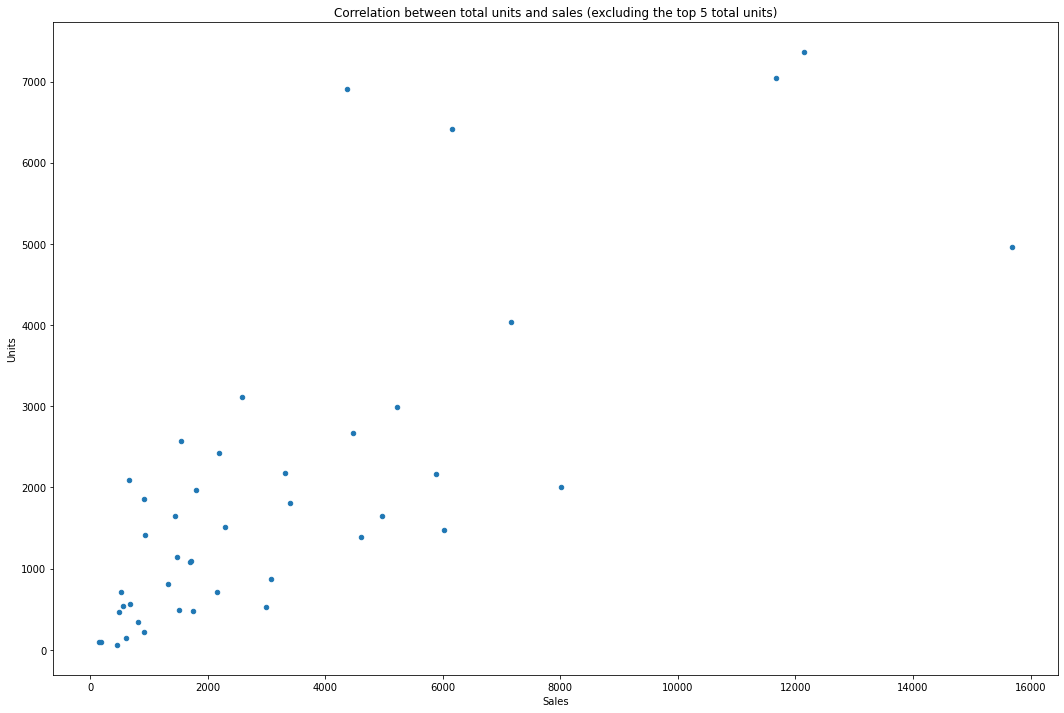

In [24]:
sales_correl = units_sales[5:].plot(kind="scatter", x='Sales', y='Units', figsize=(18,12))
sales_correl.set_title("Correlation between total units and sales (excluding the top 5 total units)")

## Observation 
The segment category family casual is declining on its year on year sales while the fast casual & burger is increasing 

In [25]:
yoy_sales_segment_categ = resto_cleaned.groupby('Segment_Category')["YOY_Sales(%)"].sum().to_frame().sort_values(by="YOY_Sales(%)", ascending=False)
yoy_sales_segment_categ.head(10) 

,YOY_Sales(%)
Segment_Category,
Fast Casual & Burger,66.6
Steak,60.3
Mexican,58.1
Chicken,52.6
Fast Casual & Chicken,38.9
Fast Casual & Sandwich,38.0
Sports Bar,35.3
Quick Service & Chicken,34.3
Quick Service & Beverage,33.8


Text(0.5, 0, 'YOY Sales in %')

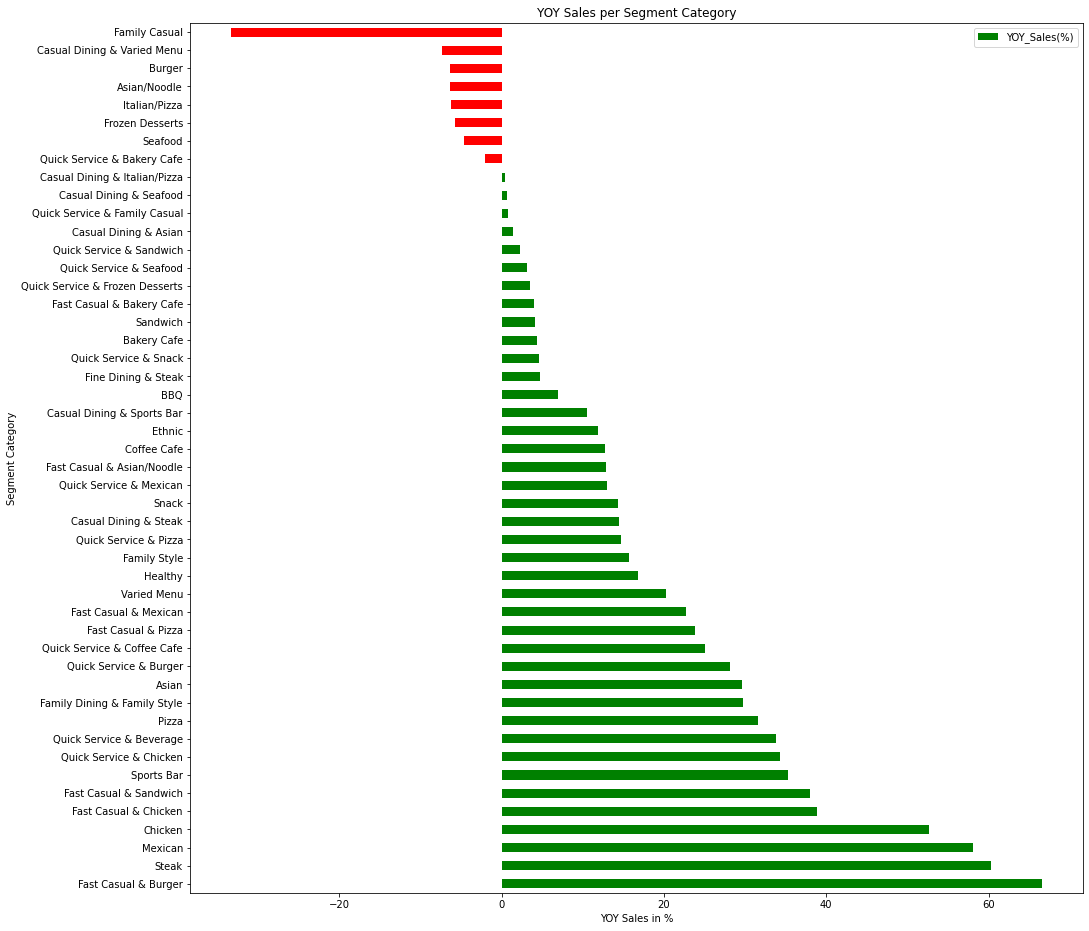

In [26]:
yoy_sales_segment_categ['positive'] = yoy_sales_segment_categ > 0
viz_yoy_sales_segment = yoy_sales_segment_categ.reset_index()
ax = viz_yoy_sales_segment.plot.barh(figsize=(16,16), x="Segment_Category", y="YOY_Sales(%)", color=yoy_sales_segment_categ['positive'].map({True:'g', False:'r'}))
ax.set_title("YOY Sales per Segment Category")
ax.set_ylabel("Segment Category")
ax.set_xlabel("YOY Sales in %")

## Observation
The segment category family casual is declining on its year on year sales while the fast casual & burger is increasing 

In [27]:
yoy_units_segment_categ = resto_cleaned.groupby('Segment_Category')["YOY_Units(%)"].sum().to_frame().sort_values(by="YOY_Units(%)", ascending=False)
yoy_units_segment_categ.head(10) 

,YOY_Units(%)
Segment_Category,
Fast Casual & Burger,50.6
Sports Bar,45.9
Chicken,38.0
Varied Menu,33.4
Steak,31.0
Fast Casual & Sandwich,27.2
Quick Service & Beverage,22.2
Asian,21.6
Mexican,20.0


Text(0.5, 0, 'YOY Units in %')

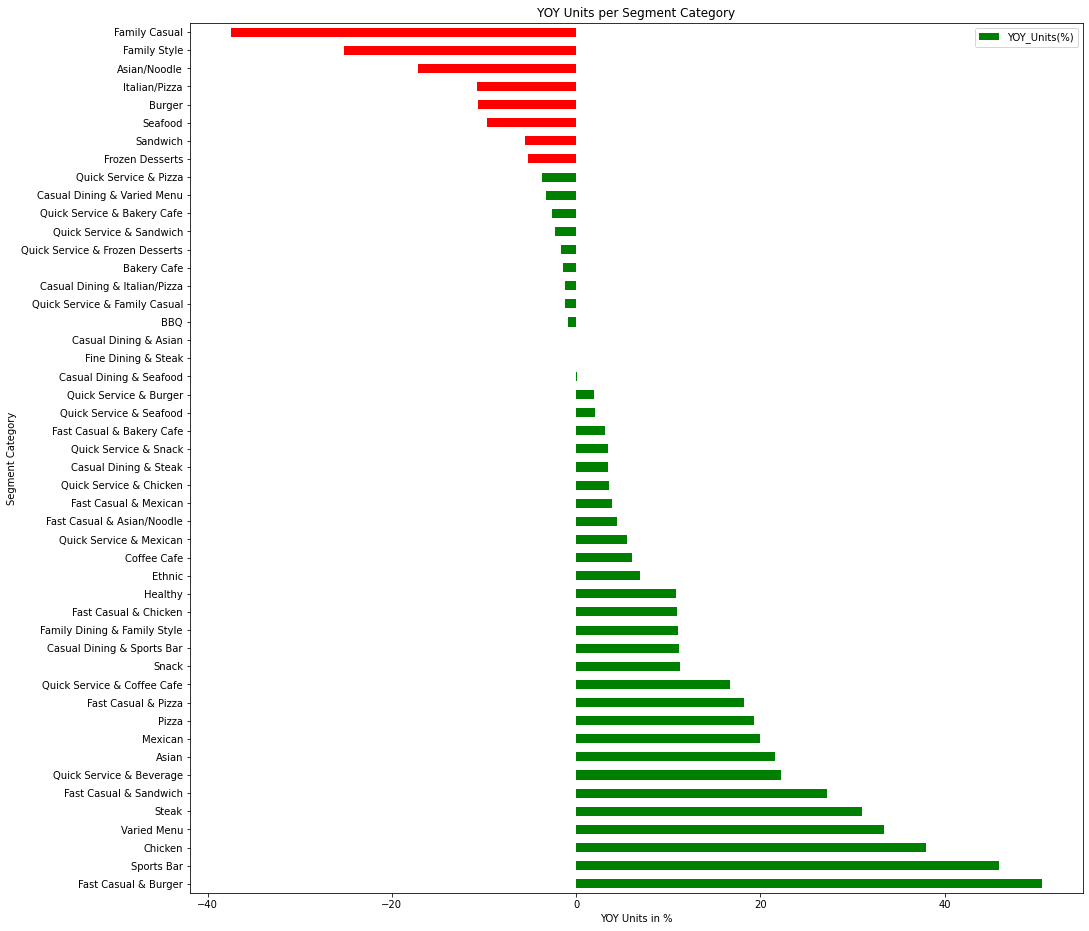

In [28]:
yoy_units_segment_categ['positive'] = yoy_units_segment_categ > 0
viz_yoy_units_segment_categ = yoy_units_segment_categ.reset_index()
ax = viz_yoy_units_segment_categ.plot.barh(figsize=(16,16), x="Segment_Category", y="YOY_Units(%)", color=yoy_sales_segment_categ['positive'].map({True:'g', False:'r'}))
ax.set_title("YOY Units per Segment Category")
ax.set_ylabel("Segment Category")
ax.set_xlabel("YOY Units in %")

## Exploratory Analysis
Since we saw the results for both the YOY Sales and YOY Units, we observed that it has the same highest and lowest segment category. Does the YOY Sales have a correlation with the YOY Units?


## Observation 
The scatter plot below supports the observation between the graphs above that the YOY sales have a correlation with the YOY units. 

In [29]:
yoy_sales_segment_categ = yoy_sales_segment_categ.drop(['positive'], axis=1)
yoy_units_segment_categ = yoy_units_segment_categ.drop(['positive'], axis=1)


In [30]:
yoy_units_sales = yoy_units_segment_categ.join(yoy_sales_segment_categ) 

Text(0.5, 1.0, 'Correlation between yoy units and yoy sales')

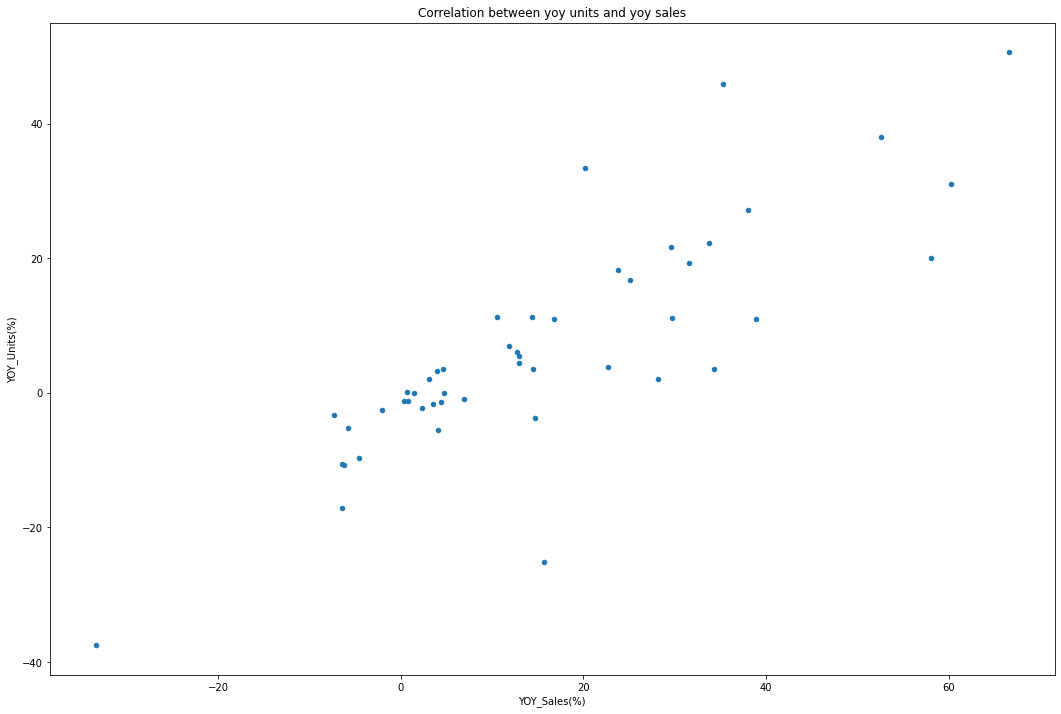

In [31]:
yoy_correl = yoy_units_sales.plot(kind="scatter", x='YOY_Sales(%)', y='YOY_Units(%)', figsize=(18,12))
yoy_correl.set_title("Correlation between yoy units and yoy sales")

## Observation
This chart shows that most categories with YOY units that are positive have a positive or higher YOY sales, while those that have negative YOY Units tend to have negative YOY sales or lower than those who have positive YOY units

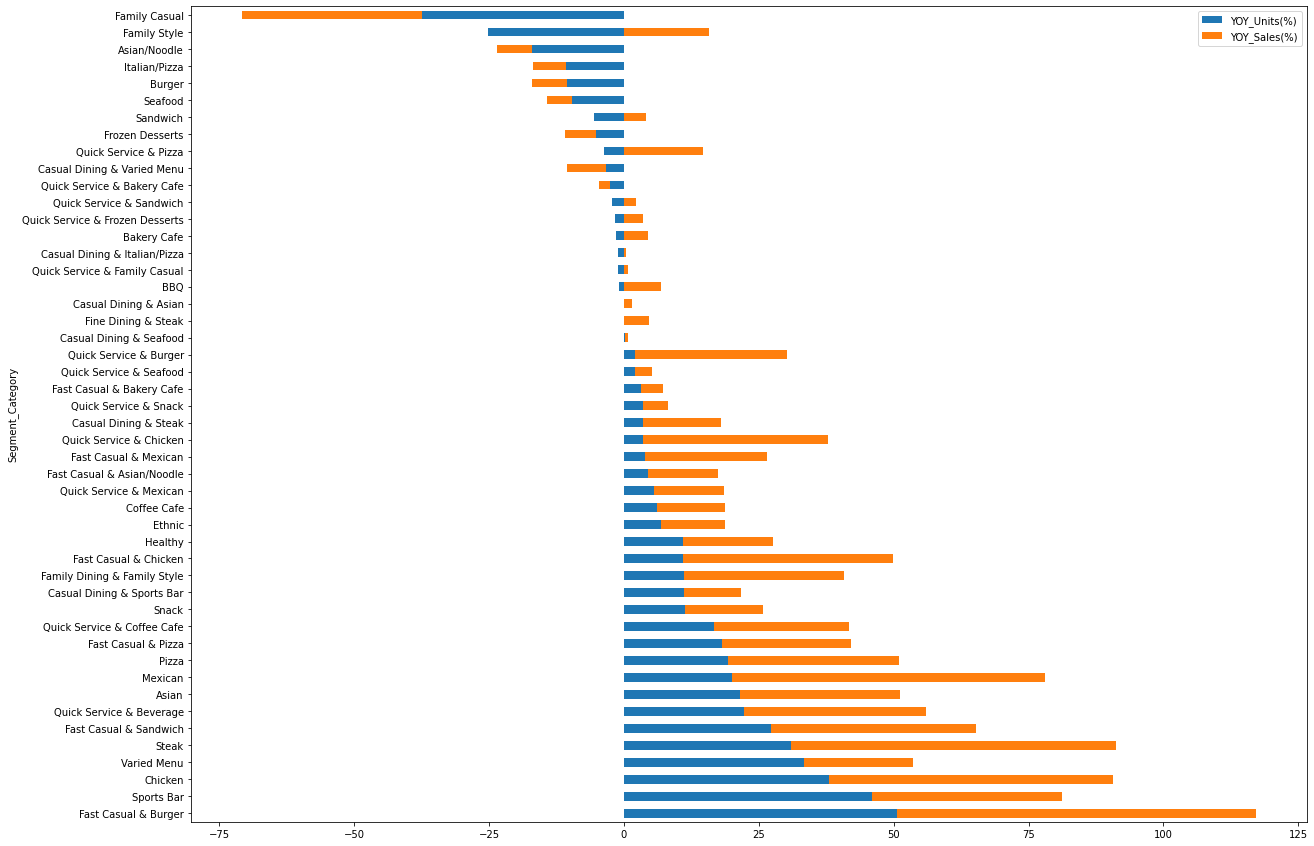

In [32]:
ax = yoy_units_sales.plot.barh(figsize=(20,15), stacked=True)

## Summary
The quick service & burger both has the most sales and most units. Meanwhile, the quick service category in general gathered the most sales. Then for the Year-On-Year(YOY) statistics, the family casual category seems to be declining on both YOY units and sales while the fast casual & burger is increasing. 